Установка библиотек

In [ ]:
!pip install vk_api
import vk_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.0 MB/s eta 0:00:00


Получение сессии

In [ ]:
token = ' '

session = vk_api.VkApi(token=token)
vk = session.get_api()

Создание графа друзей пользователя с идентификатором 240822739 и соединяет его с другими членами группы, указанными в списке member_ids

In [ ]:
import networkx as nx
G = nx.Graph()
member_ids = [240822739, 61265674, 162541236]  #Пользователи Влад, Фаиль, Ваня
for member in member_ids:
    friends = vk.friends.get(user_id=240822739)
    result = [G.add_edge(member, friend) for friend in friends['items']]

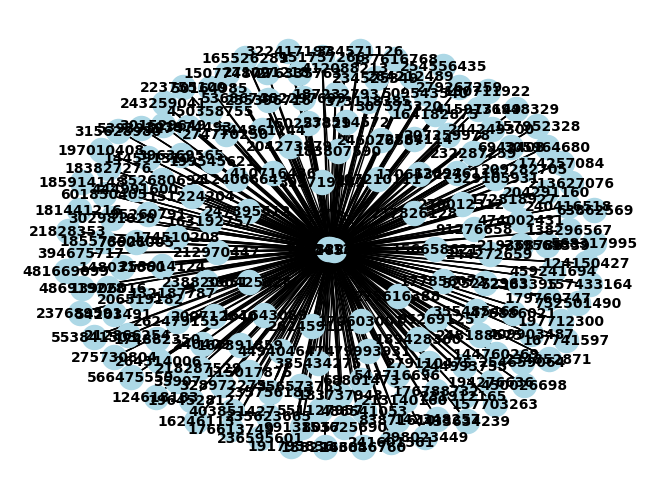

In [ ]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()

In [ ]:
import time
def get_friends(vk, user_id):
    try:
        friends = vk.friends.get(user_id=user_id)
        return [friend for friend in friends['items']]
    except Exception as e:
        print(e)
        return []


G1 = nx.Graph()
member_ids = [240822739, 61265674, 162541236]
for member in member_ids:
    G1.add_node(member)
    friends = get_friends(vk, member)

    for friend in friends:
        print(friend)
        G1.add_node(friend)
        G1.add_edge(member, friend)
        fofs = get_friends(vk, user_id=friend)[:50]
        for fof in fofs:
            G1.add_node(fof)
            G1.add_edge(friend, fof)

    time.sleep(1)

35907
240409
6942408
13906016
16246113
21828353
50164985
52383395
53686746
54203491
61265674
63862569
68801473
72784114
76606005
83871610
91276658
95260791
95269125
99138057
115017875
124150427
124618183
128946116
132187787
137616768
138296567
142348257
144591310
144760269
144861244
146846760
148031660
150774879
151224204
151757266
153625690
156658621
157433164
157703263
157952328
160257329
161643089
162541236
163192757
164182875
165526289
167391859
167741597
[18] User was deleted or banned
170603001
170653227
172818927
174257084
174510208
174882350
176613749
176788732
176948329
177856072
179760747
180711922
181441216
183737943
183807590
183827276
185573921
185914148
187232793
188226305
189428360
191793836
194276636
196452812
197010408
197712300
199545621
200712840
204273879
204291160
206519182
207259978
209282705
212406664
212866254
212970447
213140160
213627076
218287529
219368786
223755100
231912165
232287259
234525349
234852871
235623665
235756185
236595601
237689591
238514572
2388

Количество ребер

In [ ]:
G1.number_of_edges()

15416

In [ ]:
G1.number_of_nodes()

12683

Центральность по посредничеству



In [ ]:
betweenness = nx.betweenness_centrality(G1)
for node, value in betweenness.items():
    print(f"Узел {node}: {value}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Узел 222881726: 0.0
Узел 223834759: 0.0
Узел 226066542: 0.0
Узел 236830262: 0.0
Узел 242734933: 0.0
Узел 247697015: 1.3566977507419837e-06
Узел 270646170: 0.0
Узел 275915758: 0.0
Узел 299456116: 0.0
Узел 300891912: 0.0
Узел 304925034: 0.0
Узел 336660095: 0.0
Узел 353020269: 0.0
Узел 383022702: 0.0
Узел 412751788: 0.0
Узел 426070640: 0.0
Узел 442700624: 0.0
Узел 493979642: 0.0
Узел 504205956: 0.0
Узел 540659311: 0.0
Узел 558796855: 0.0
Узел 575289797: 0.0
Узел 3755782: 0.0
Узел 3836091: 0.0
Узел 5030043: 0.0
Узел 33434177: 0.0
Узел 97644661: 0.0
Узел 103832250: 0.0
Узел 122256667: 0.0
Узел 127479864: 0.0
Узел 138015194: 0.0
Узел 141149084: 0.0
Узел 155047339: 0.0
Узел 155290829: 2.0564867036870118e-05
Узел 159465489: 0.0
Узел 162928094: 0.0
Узел 164905243: 0.0
Узел 168807808: 0.0
Узел 170462269: 0.0
Узел 172228945: 0.0
Узел 175526939: 0.0
Узел 176192696: 0.0
Узел 180472536: 0.0
Узел 181191426: 0.0
Узел 181464514: 0.0
Уз

Центральность по близости

In [ ]:
closeness = nx.closeness_centrality(G1)
for node, value in closeness.items():
    print(f"Узел {node}: {value}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Узел 222881726: 0.21139132898838198
Узел 223834759: 0.21139132898838198
Узел 226066542: 0.21139132898838198
Узел 236830262: 0.21139132898838198
Узел 242734933: 0.21139132898838198
Узел 247697015: 0.21197078339935482
Узел 270646170: 0.21139132898838198
Узел 275915758: 0.21139132898838198
Узел 299456116: 0.21139132898838198
Узел 300891912: 0.21139132898838198
Узел 304925034: 0.21139132898838198
Узел 336660095: 0.21139132898838198
Узел 353020269: 0.21139132898838198
Узел 383022702: 0.21139132898838198
Узел 412751788: 0.21139132898838198
Узел 426070640: 0.21139132898838198
Узел 442700624: 0.21139132898838198
Узел 493979642: 0.21139132898838198
Узел 504205956: 0.21139132898838198
Узел 540659311: 0.21139132898838198
Узел 558796855: 0.21139132898838198
Узел 575289797: 0.21139132898838198
Узел 3755782: 0.2134549677679969
Узел 3836091: 0.2134549677679969
Узел 5030043: 0.2134549677679969
Узел 33434177: 0.2134549677679969
Узел 97

Центральность по собственному значению

In [ ]:
eigenvector = nx.eigenvector_centrality(G1)
for node, value in eigenvector.items():
    print(f"Узел {node}: {value}")

Выходные данные были обрезаны до нескольких последних строк (5000).
Узел 222881726: 0.0003132269765934769
Узел 223834759: 0.0003132269765934769
Узел 226066542: 0.0003132269765934769
Узел 236830262: 0.0003132269765934769
Узел 242734933: 0.0003132269765934769
Узел 247697015: 0.0006347899594347126
Узел 270646170: 0.0003132269765934769
Узел 275915758: 0.0003132269765934769
Узел 299456116: 0.0003132269765934769
Узел 300891912: 0.0003132269765934769
Узел 304925034: 0.0003132269765934769
Узел 336660095: 0.0003132269765934769
Узел 353020269: 0.0003132269765934769
Узел 383022702: 0.0003132269765934769
Узел 412751788: 0.0003132269765934769
Узел 426070640: 0.0003132269765934769
Узел 442700624: 0.0003132269765934769
Узел 493979642: 0.0003132269765934769
Узел 504205956: 0.0003132269765934769
Узел 540659311: 0.0003132269765934769
Узел 558796855: 0.0003132269765934769
Узел 575289797: 0.0003132269765934769
Узел 3755782: 0.000624796421091076
Узел 3836091: 0.000624796421091076
Узел 5030043: 0.0006247964

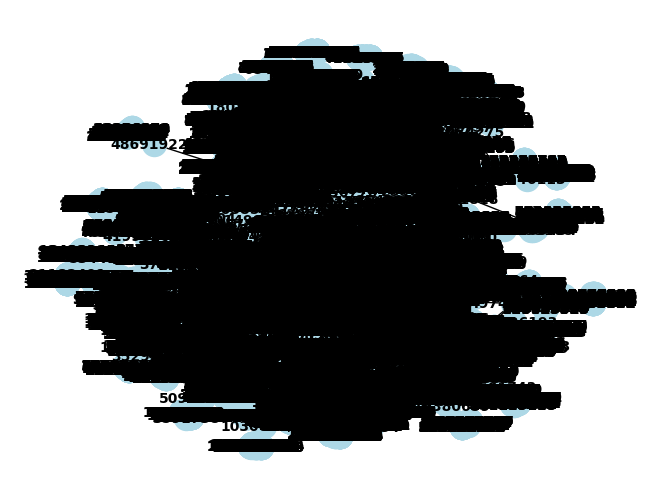

In [ ]:
nx.draw(G1, with_labels=True, node_color='lightblue', font_size=10, font_weight='bold')
plt.show()

Максимальное значение центральости по посреднечеству

In [ ]:
max_key = max(betweenness, key=betweenness.get)
print(f"ID узла: {max_key}, Значение: {betweenness[max_key]}")
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Проверяем, достаточно ли элементов для 2-го и 3-го места
if len(sorted_betweenness) >= 3:
    max_key = sorted_betweenness[0]  # 1 место
    second_key = sorted_betweenness[1]  # 2 место
    third_key = sorted_betweenness[2]  # 3 место

    print(f"1 место - ID узла: {max_key[0]}, Значение: {max_key[1]}")
    print(f"2 место - ID узла: {second_key[0]}, Значение: {second_key[1]}")
    print(f"3 место - ID узла: {third_key[0]}, Значение: {third_key[1]}")
else:
    print("Недостаточно элементов для определения 2-го и 3-го места.")

ID узла: 240822739, Значение: 0.6003941751950364
1 место - ID узла: 240822739, Значение: 0.6003941751950364
2 место - ID узла: 162541236, Значение: 0.5491045489320912
3 место - ID узла: 61265674, Значение: 0.1759991205941216


Максимальное значение центральность по близости

In [ ]:
max_key_1 = max(closeness, key=closeness.get)
print(f"ID узла: {max_key_1}, Значение: {closeness[max_key_1]}")
# Сортировка словаря closeness по значениям в порядке убывания
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Проверяем, достаточно ли элементов
if len(sorted_closeness) >= 3:
    max_key_1 = sorted_closeness[0]  # 1 место
    second_key = sorted_closeness[1]  # 2 место
    third_key = sorted_closeness[2]  # 3 место

    print(f"1 место - ID узла: {max_key_1[0]}, Значение: {max_key_1[1]}")
    print(f"2 место - ID узла: {second_key[0]}, Значение: {second_key[1]}")
    print(f"3 место - ID узла: {third_key[0]}, Значение: {third_key[1]}")
else:
    print("Недостаточно элементов для определения 2-го и 3-го места.")


ID узла: 240822739, Значение: 0.4097311966916516
1 место - ID узла: 240822739, Значение: 0.4097311966916516
2 место - ID узла: 162541236, Значение: 0.3957930216590725
3 место - ID узла: 61265674, Значение: 0.3629546950573824


Максимальное значение центральность по собственному значению

In [ ]:
max_key_2 = max(eigenvector, key=eigenvector.get)
print(f"ID узла: {max_key_2}, Значение: {eigenvector[max_key_2]}")
# Сортировка словаря eigenvector по значениям в порядке убывания
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)

# Проверяем, достаточно ли элементов
if len(sorted_eigenvector) >= 3:
    max_key_2 = sorted_eigenvector[0]  # 1 место
    second_key = sorted_eigenvector[1]  # 2 место
    third_key = sorted_eigenvector[2]  # 3 место

    print(f"1 место - ID узла: {max_key_2[0]}, Значение: {max_key_2[1]}")
    print(f"2 место - ID узла: {second_key[0]}, Значение: {second_key[1]}")
    print(f"3 место - ID узла: {third_key[0]}, Значение: {third_key[1]}")
else:
    print("Недостаточно элементов для определения 2-го и 3-го места.")


ID узла: 240822739, Значение: 0.3822762028140959
1 место - ID узла: 240822739, Значение: 0.3822762028140959
2 место - ID узла: 95269125, Значение: 0.18999042511436434
3 место - ID узла: 146846760, Значение: 0.18503414704555518
